In [1]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
from matplotlib.ticker import MultipleLocator 

%matplotlib inline

In [2]:
path = os.getcwd().split('TianChi_IJCAI-17_footfall_prediction_code')[0]

#shop_info = pd.read_table(path+'dataset/shop_info.txt',names=['shop_id','city_name','location_id','per_pay','score','comment_cnt','shop_level','cate_1_name','cate_2_name','cate_3_name'],header=None,delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)
shop_info = pd.read_table(path+'dataset/shop info with count.csv',delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)

shop_info.index = shop_info['shop_id'].tolist()

## 基本的计算

In [9]:
def dateRange(start, end):
    days = (datetime.datetime.strptime(end, "%Y-%m-%d") - datetime.datetime.strptime(start, "%Y-%m-%d")).days + 1
    return [datetime.datetime.strftime(datetime.datetime.strptime(start, "%Y-%m-%d") + datetime.timedelta(i), "%Y-%m-%d") for i in xrange(days)]
#len(dateRange('2015-07-01','2016-10-31'))

### 计算每周count

In [4]:

#  占个格子 &&  cal avg sales count each day
total_day = pd.to_datetime('2016-11-01').date()-pd.to_datetime('2015-07-01').date() 
total_day = total_day.days
total_week = total_day / 7  # 69个
start_day = pd.to_datetime('2016-11-01').date() - datetime.timedelta(total_week*7)
#print start_day
for week_number in range(total_week): # 0~68
    start_day_of_week = start_day +  datetime.timedelta(week_number*7) 
    end_day_of_week = start_day_of_week + datetime.timedelta(6)
    start_day_of_week =   start_day_of_week.strftime("%Y-%m-%d")
    end_day_of_week = end_day_of_week.strftime("%Y-%m-%d")
    print start_day_of_week,end_day_of_week
    shop_info['wk_'+str(week_number)] = shop_info.loc[:,start_day_of_week:end_day_of_week].mean(axis=1)


2015-07-07 2015-07-13
2015-07-14 2015-07-20
2015-07-21 2015-07-27
2015-07-28 2015-08-03
2015-08-04 2015-08-10
2015-08-11 2015-08-17
2015-08-18 2015-08-24
2015-08-25 2015-08-31
2015-09-01 2015-09-07
2015-09-08 2015-09-14
2015-09-15 2015-09-21
2015-09-22 2015-09-28
2015-09-29 2015-10-05
2015-10-06 2015-10-12
2015-10-13 2015-10-19
2015-10-20 2015-10-26
2015-10-27 2015-11-02
2015-11-03 2015-11-09
2015-11-10 2015-11-16
2015-11-17 2015-11-23
2015-11-24 2015-11-30
2015-12-01 2015-12-07
2015-12-08 2015-12-14
2015-12-15 2015-12-21
2015-12-22 2015-12-28
2015-12-29 2016-01-04
2016-01-05 2016-01-11
2016-01-12 2016-01-18
2016-01-19 2016-01-25
2016-01-26 2016-02-01
2016-02-02 2016-02-08
2016-02-09 2016-02-15
2016-02-16 2016-02-22
2016-02-23 2016-02-29
2016-03-01 2016-03-07
2016-03-08 2016-03-14
2016-03-15 2016-03-21
2016-03-22 2016-03-28
2016-03-29 2016-04-04
2016-04-05 2016-04-11
2016-04-12 2016-04-18
2016-04-19 2016-04-25
2016-04-26 2016-05-02
2016-05-03 2016-05-09
2016-05-10 2016-05-16
2016-05-17

### 计算最后三周 中位数、极大值 、极小值

In [165]:
wk1=['2016-10-11','2016-10-17']
wk2=['2016-10-18','2016-10-24']
wk3=['2016-10-25','2016-10-31']
def cal_median_wkn(x,wkn):
    return sorted(x[wkn[0]:wkn[1]].tolist())[3]
def cal_max_wkn(x,wkn):
    return max(x[wkn[0]:wkn[1]].tolist())
def cal_min_wkn(x,wkn):
    return min(x[wkn[0]:wkn[1]].tolist())

shop_info['median_wk_1'] = shop_info.apply(lambda x: cal_median_wkn(x,wk1),axis=1)
shop_info['median_wk_2'] = shop_info.apply(lambda x: cal_median_wkn(x,wk2),axis=1)
shop_info['median_wk_3'] = shop_info.apply(lambda x: cal_median_wkn(x,wk3),axis=1)
shop_info['min_wk_1'] = shop_info.apply(lambda x: cal_min_wkn(x,wk1),axis=1)
shop_info['min_wk_2'] = shop_info.apply(lambda x: cal_min_wkn(x,wk2),axis=1)
shop_info['min_wk_3'] = shop_info.apply(lambda x: cal_min_wkn(x,wk3),axis=1)
shop_info['max_wk_1'] = shop_info.apply(lambda x: cal_max_wkn(x,wk1),axis=1)
shop_info['max_wk_2'] = shop_info.apply(lambda x: cal_max_wkn(x,wk2),axis=1)
shop_info['max_wk_3'] = shop_info.apply(lambda x: cal_max_wkn(x,wk3),axis=1)


### 计算最后三周 极大值 、极小值是周几

In [170]:
def cal_max_wkn_day(x,wkn):
    if wkn == ['2016-10-11','2016-10-17'] :  max_wk = x['max_wk_1']
    if wkn == ['2016-10-18','2016-10-24']:  max_wk = x['max_wk_2']
    if wkn == ['2016-10-25','2016-10-31']:  max_wk = x['max_wk_3']
    count = 1
    for i in x[wkn[0]:wkn[1]].tolist():
        if i == max_wk:
            return count
        count +=1
    return 0
def cal_min_wkn_day(x,wkn):
    if wkn == ['2016-10-11','2016-10-17'] :  min_wk = x['min_wk_1']
    if wkn == ['2016-10-18','2016-10-24']:  min_wk = x['min_wk_2']
    if wkn == ['2016-10-25','2016-10-31']:  min_wk = x['min_wk_3']
    count = 1
    for i in x[wkn[0]:wkn[1]].tolist():
        if i == min_wk:
            return count
        count +=1
    return 0
    
shop_info['max_wk_1_day'] = shop_info.apply(lambda x: cal_max_wkn_day(x,wk1),axis=1)
shop_info['max_wk_2_day'] = shop_info.apply(lambda x: cal_max_wkn_day(x,wk2),axis=1)
shop_info['max_wk_3_day'] = shop_info.apply(lambda x: cal_max_wkn_day(x,wk3),axis=1)
    
shop_info['min_wk_1_day'] = shop_info.apply(lambda x: cal_min_wkn_day(x,wk1),axis=1)
shop_info['min_wk_2_day'] = shop_info.apply(lambda x: cal_min_wkn_day(x,wk2),axis=1)
shop_info['min_wk_3_day'] = shop_info.apply(lambda x: cal_min_wkn_day(x,wk3),axis=1)

In [190]:
v1 = np.array(shop_info.loc[1,wk1[0]:wk1[1]].tolist())
v2 = np.array(shop_info.loc[1,wk2[0]:wk2[1]].tolist())

v1.dot(v2) / (np.sqrt(np.sum(np.square(v1))) + np.sqrt(np.sum(np.square(v2))))

302.6868230760067

### 计算倒数三周之间的余弦相似度

In [196]:
wk1=['2016-10-11','2016-10-17']
wk2=['2016-10-18','2016-10-24']
wk3=['2016-10-25','2016-10-31']
def cal_cos_sim_between(x,wka,wkb):
    wka_vec =  np.array(x[wka[0]:wka[1]].tolist())
    wkb_vec =  np.array(x[wkb[0]:wkb[1]].tolist())
    sim = wka_vec.dot(wkb_vec) / (np.sqrt(np.sum(np.square(wka_vec))) * np.sqrt(np.sum(np.square(wkb_vec))))
    return sim
shop_info['cos_sim_between_wk_1_2'] = shop_info.apply(lambda x: cal_cos_sim_between(x,wk1,wk2),axis=1)
shop_info['cos_sim_between_wk_2_3'] = shop_info.apply(lambda x: cal_cos_sim_between(x,wk2,wk3),axis=1)
shop_info['cos_sim_between_wk_1_3'] = shop_info.apply(lambda x: cal_cos_sim_between(x,wk1,wk3),axis=1)

In [202]:
shop_info['cos_sim_between_wk_1_2'].replace(np.NaN,0.0,inplace=True)
shop_info['cos_sim_between_wk_2_3'].replace(np.NaN,0.0,inplace=True)
shop_info['cos_sim_between_wk_1_3'].replace(np.NaN,0.0,inplace=True)

### 计算每一周与下一周之间的余弦相似度

In [247]:
def cal_cos_sim(x,start_day_of_week,end_day_of_week,start_day_of_next_week,end_day_of_next_week):
    wka_vec =  np.array(x[start_day_of_week:end_day_of_week].tolist())
    wkb_vec =  np.array(x[start_day_of_next_week:end_day_of_next_week].tolist())
    sim = wka_vec.dot(wkb_vec) / (np.sqrt(np.sum(np.square(wka_vec))) * np.sqrt(np.sum(np.square(wkb_vec))))
    return sim
    
    
total_day = pd.to_datetime('2016-11-01').date()-pd.to_datetime('2015-07-01').date() 
total_day = total_day.days
total_week = total_day / 7
start_day = pd.to_datetime('2015-07-07').date()
for week_number in range(total_week-1): # 0 ~ 68-1
    start_day_of_week = start_day +  datetime.timedelta(week_number*7) 
    end_day_of_week = start_day_of_week + datetime.timedelta(6)
    start_day_of_next_week = start_day_of_week + datetime.timedelta(7)
    end_day_of_next_week = end_day_of_week + datetime.timedelta(7)
    start_day_of_week = start_day_of_week.strftime("%Y-%m-%d")
    end_day_of_week = end_day_of_week.strftime("%Y-%m-%d")
    start_day_of_next_week = start_day_of_next_week.strftime("%Y-%m-%d")
    end_day_of_next_week = end_day_of_next_week.strftime("%Y-%m-%d")
    shop_info['cos_sim_wk_'+str(week_number)] = shop_info.apply(lambda x: cal_cos_sim(x,start_day_of_week,end_day_of_week,start_day_of_next_week,end_day_of_next_week),axis=1)

## 定义的数据可视化函数

In [150]:
def draw_week_id(id,start_date='wk0',end_date='wk_68',figsieze=(16,9)):
    shop_info.loc[id,start_date:end_date].T.plot(figsize=(16,9))
def draw_week_ids(ids,start_date='wk0',end_date='wk_68',figsieze=(16,9)):
    shop_info.loc[ids,start_date:end_date].T.plot(figsize=(16,9))
def draw_ids(ids,start_date='2015-07-01',end_date='2016-10-31',by_week=False,figsize=(16,9)):
    if by_week:
        xmajorLocator = MultipleLocator(7) #将x轴次刻度标签设置为7的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
        shop_info.loc[ids,start_date:end_date].T.plot(figsize=figsize,ax=ax)
    else: shop_info.loc[ids,start_date:end_date].T.plot(figsize=figsize)
    plt.show()
def draw_ids_avg(ids,start_date='2015-07-01',end_date='2016-10-31',by_week=True,figsize=(70,10)):
    if by_week:
        xmajorLocator   = MultipleLocator(7) #将x轴次刻度标签设置为7的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
    shop_info.loc[ids,start_date:end_date].mean(axis=0).plot(figsize=figsize)
def draw_ids_diff(ids,start_date='2015-07-01',end_date='2016-10-31',by_week=False,figsize=(16,9)):  
    if by_week:
        xmajorLocator   = MultipleLocator(7) #将x轴次刻度标签设置为7的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
    (shop_info.loc[ids[0],start_date:end_date]-shop_info.loc[ids[1],start_date:end_date]).plot(figsize=figsize)
def draw_id(id,start_date='2015-07-01',end_date='2016-10-31',by_week=False,figsize=(16,9)):
    if by_week:
        xmajorLocator = MultipleLocator(7) #将x轴次刻度标签设置为7的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
    shop_info.loc[id,start_date:end_date].plot(legend=True,figsize=figsize)



## 最后三周出现零值的

In [151]:
ids_zero_in_last_three_week = {}
for date in dateRange('2016-10-11','2016-10-31'):
    for id in shop_info[shop_info[date]==0]['shop_id'].tolist():
        if id not in ids_zero_in_last_three_week.keys():
            ids_zero_in_last_three_week[id] = 0
        ids_zero_in_last_three_week[id] += 1
#print sorted(ids_zero_in_last_three_week.keys())
#print ids_zero_in_last_three_week.keys()

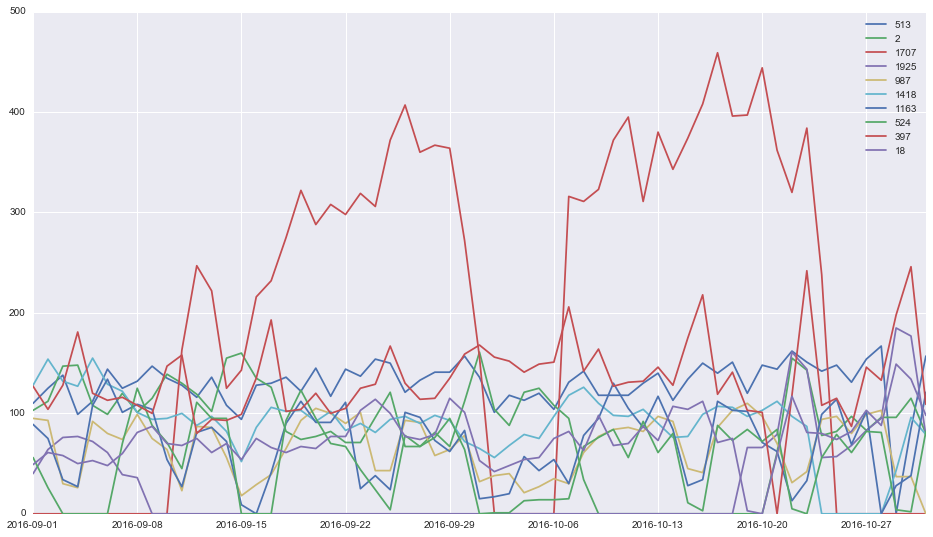

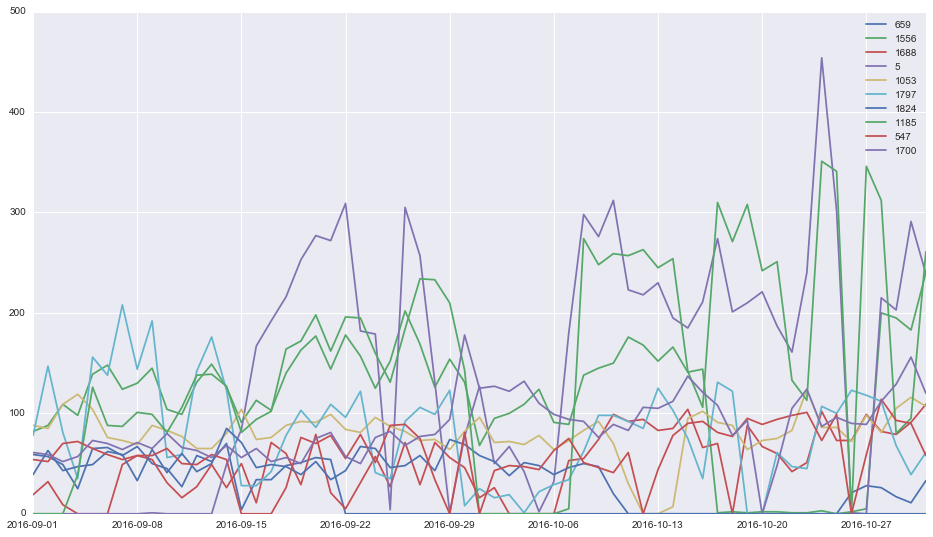

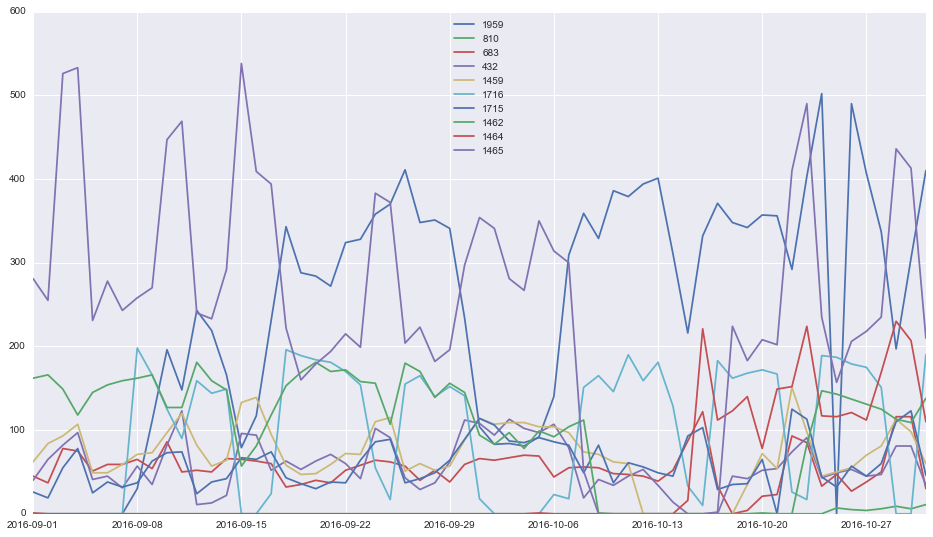

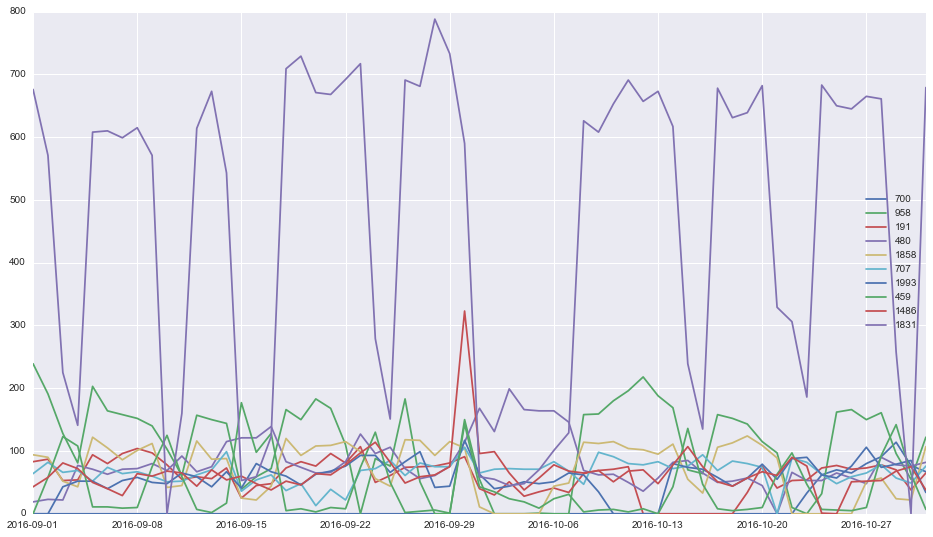

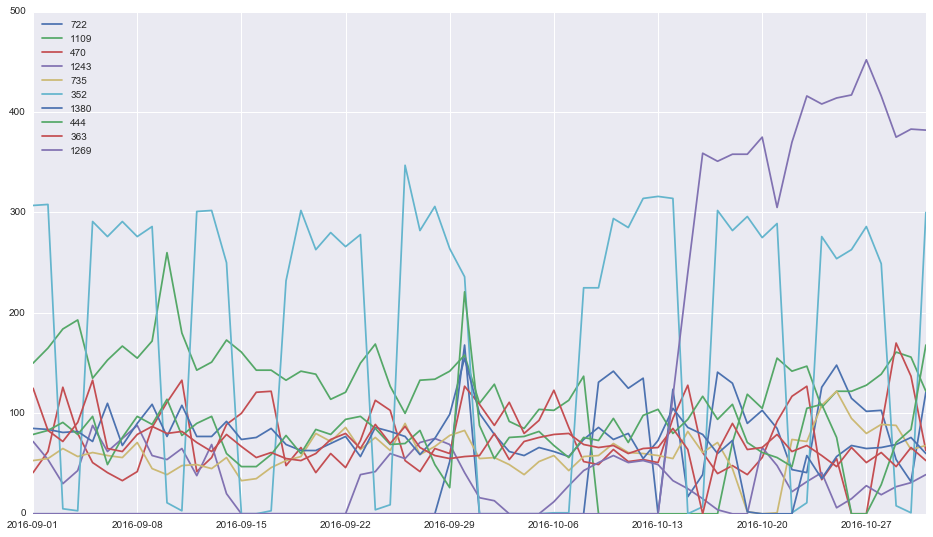

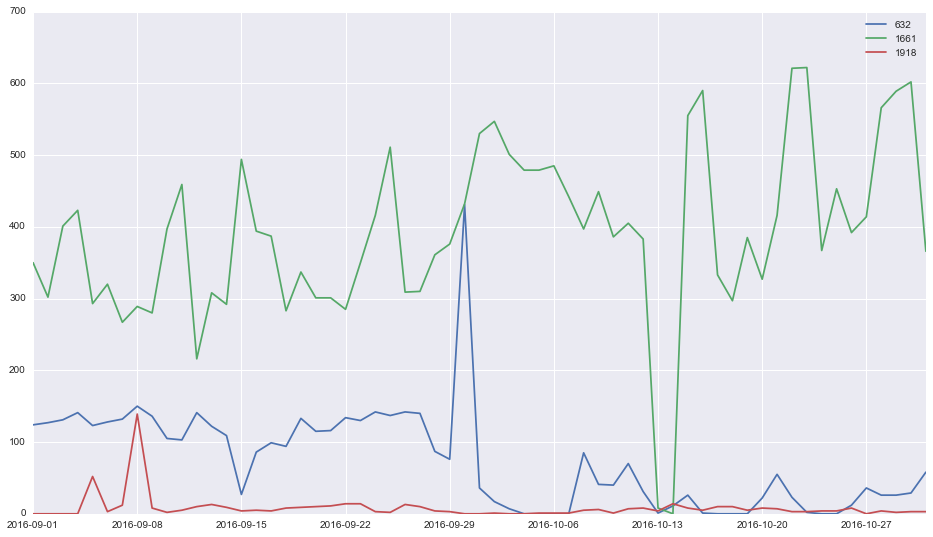

In [152]:
def draw_id_group_size(n):
    for i in range(len(ids_zero_in_last_three_week.keys())/n + 1):
        s = 0 + i*10
        e = 10 + i*10 
        if i == len(ids_zero_in_last_three_week.keys())/n : e = len(ids_zero_in_last_three_week.keys())
        draw_ids(ids_zero_in_last_three_week.keys()[s:e],start_date='2016-09-01',end_date='2016-10-31',by_week=True)
draw_id_group_size(10)

## 最后三周均值很低的

103


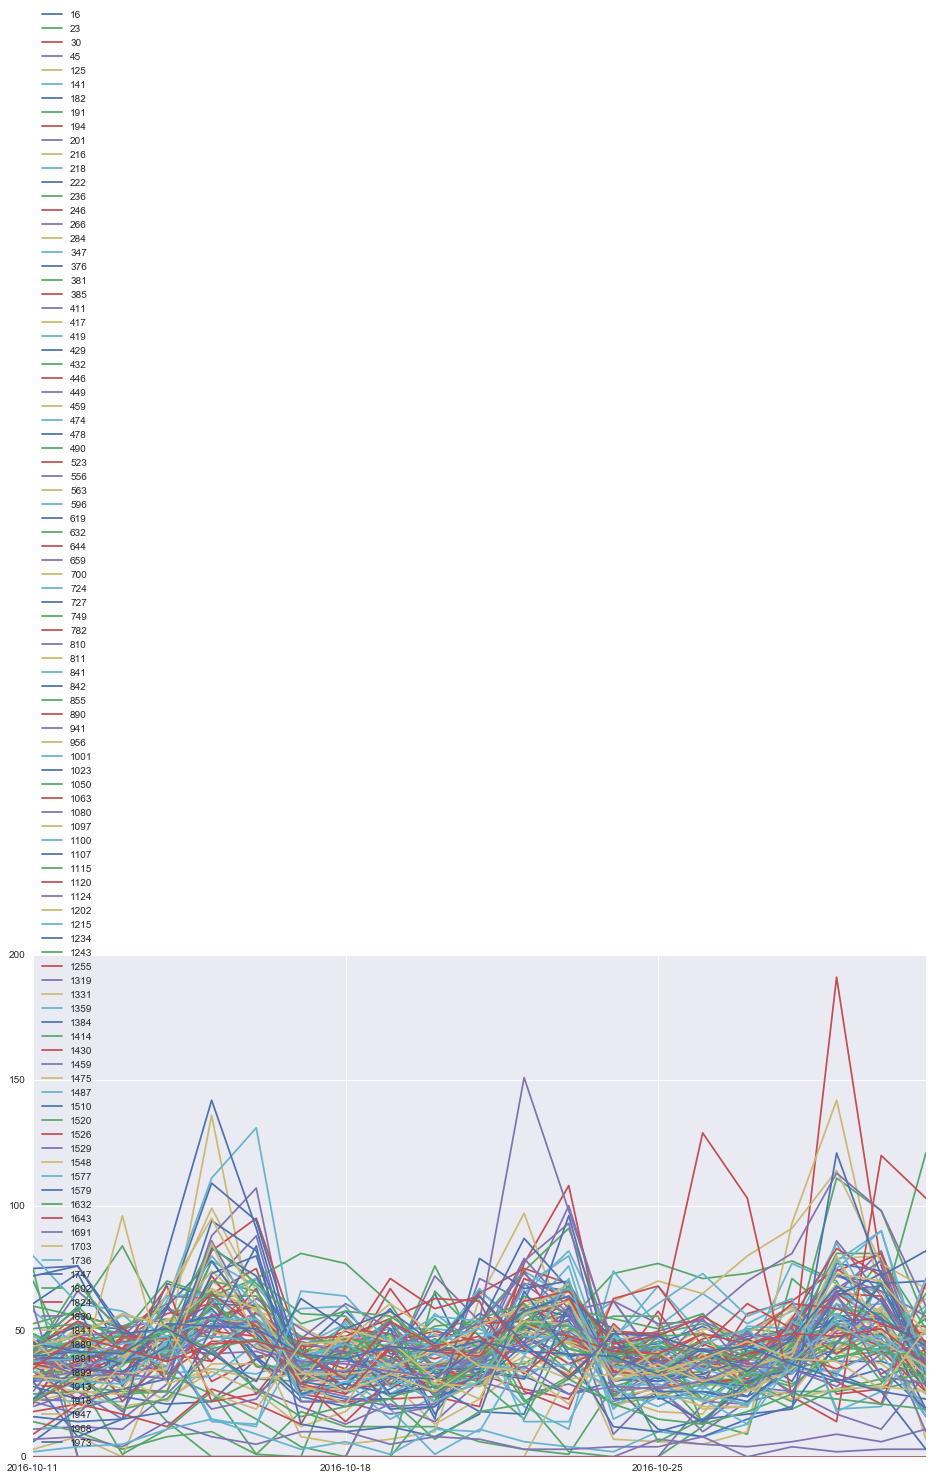

In [105]:
ids_low_count_in_last_3_wk = shop_info[shop_info.loc[:,'2016-10-11':'2016-10-31'].mean(axis=1)<50].index.tolist()
print len(ids_low_count_in_last_3_wk)
draw_ids(ids_low_count_in_last_3_wk,start_date='2016-10-11',end_date='2016-10-31',by_week=True)

13


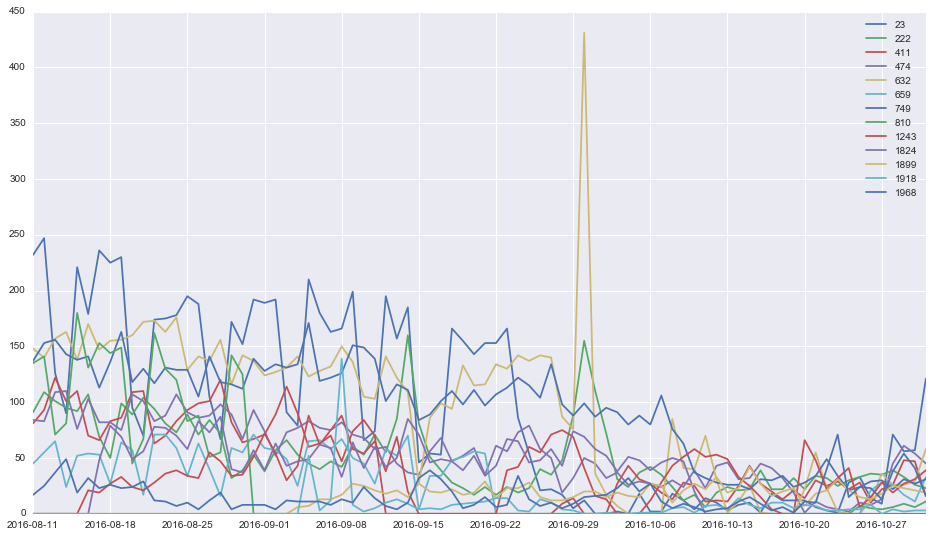

In [167]:
ids_low_count_in_last_3_wk = shop_info[shop_info.loc[:,'2016-10-11':'2016-10-31'].mean(axis=1)<30].index.tolist()
print len(ids_low_count_in_last_3_wk)
draw_ids(ids_low_count_in_last_3_wk,start_date='2016-08-11',end_date='2016-10-31',by_week=True)

有下降的，也有本来均值很低的

## 最后三周出现相对三周内极高点的

70


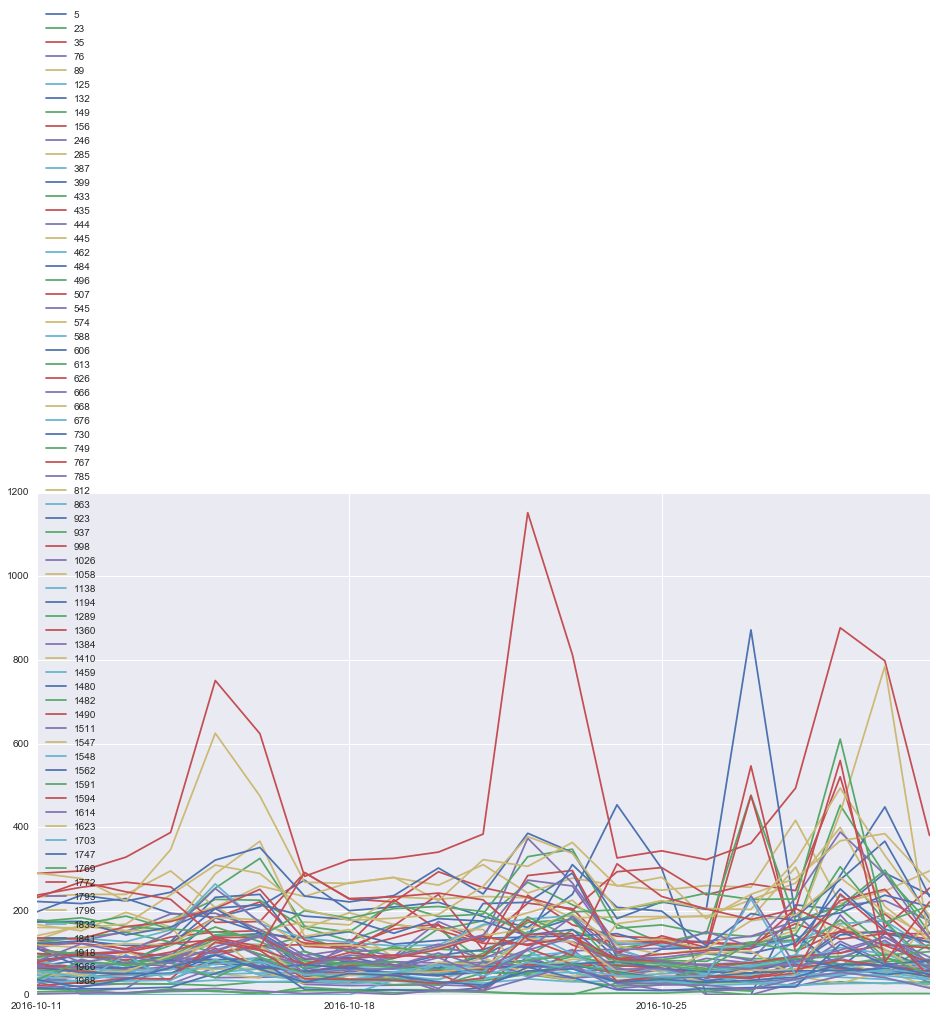

In [257]:
ids_highest_point_error_compared_to_last_three_days = []
def cal_highest_point_error_compared_to_last_three_days(x):
    sales_list = sorted(x['2016-10-11':'2016-10-31'].tolist(),reverse=True)
    if sales_list[1] > 0:
        if 1.0 * sales_list[0] / sales_list[1] > 1.3:
            ids_highest_point_error_compared_to_last_three_days.append(x['shop_id'])
shop_info.apply(lambda x: cal_highest_point_error_compared_to_last_three_days(x) ,axis=1)
print len(ids_highest_point_error_compared_to_last_three_days)

draw_ids(ids_highest_point_error_compared_to_last_three_days,start_date='2016-10-11',end_date='2016-10-31',by_week=True)

## 最后三周出现相对三周内极低点的

180


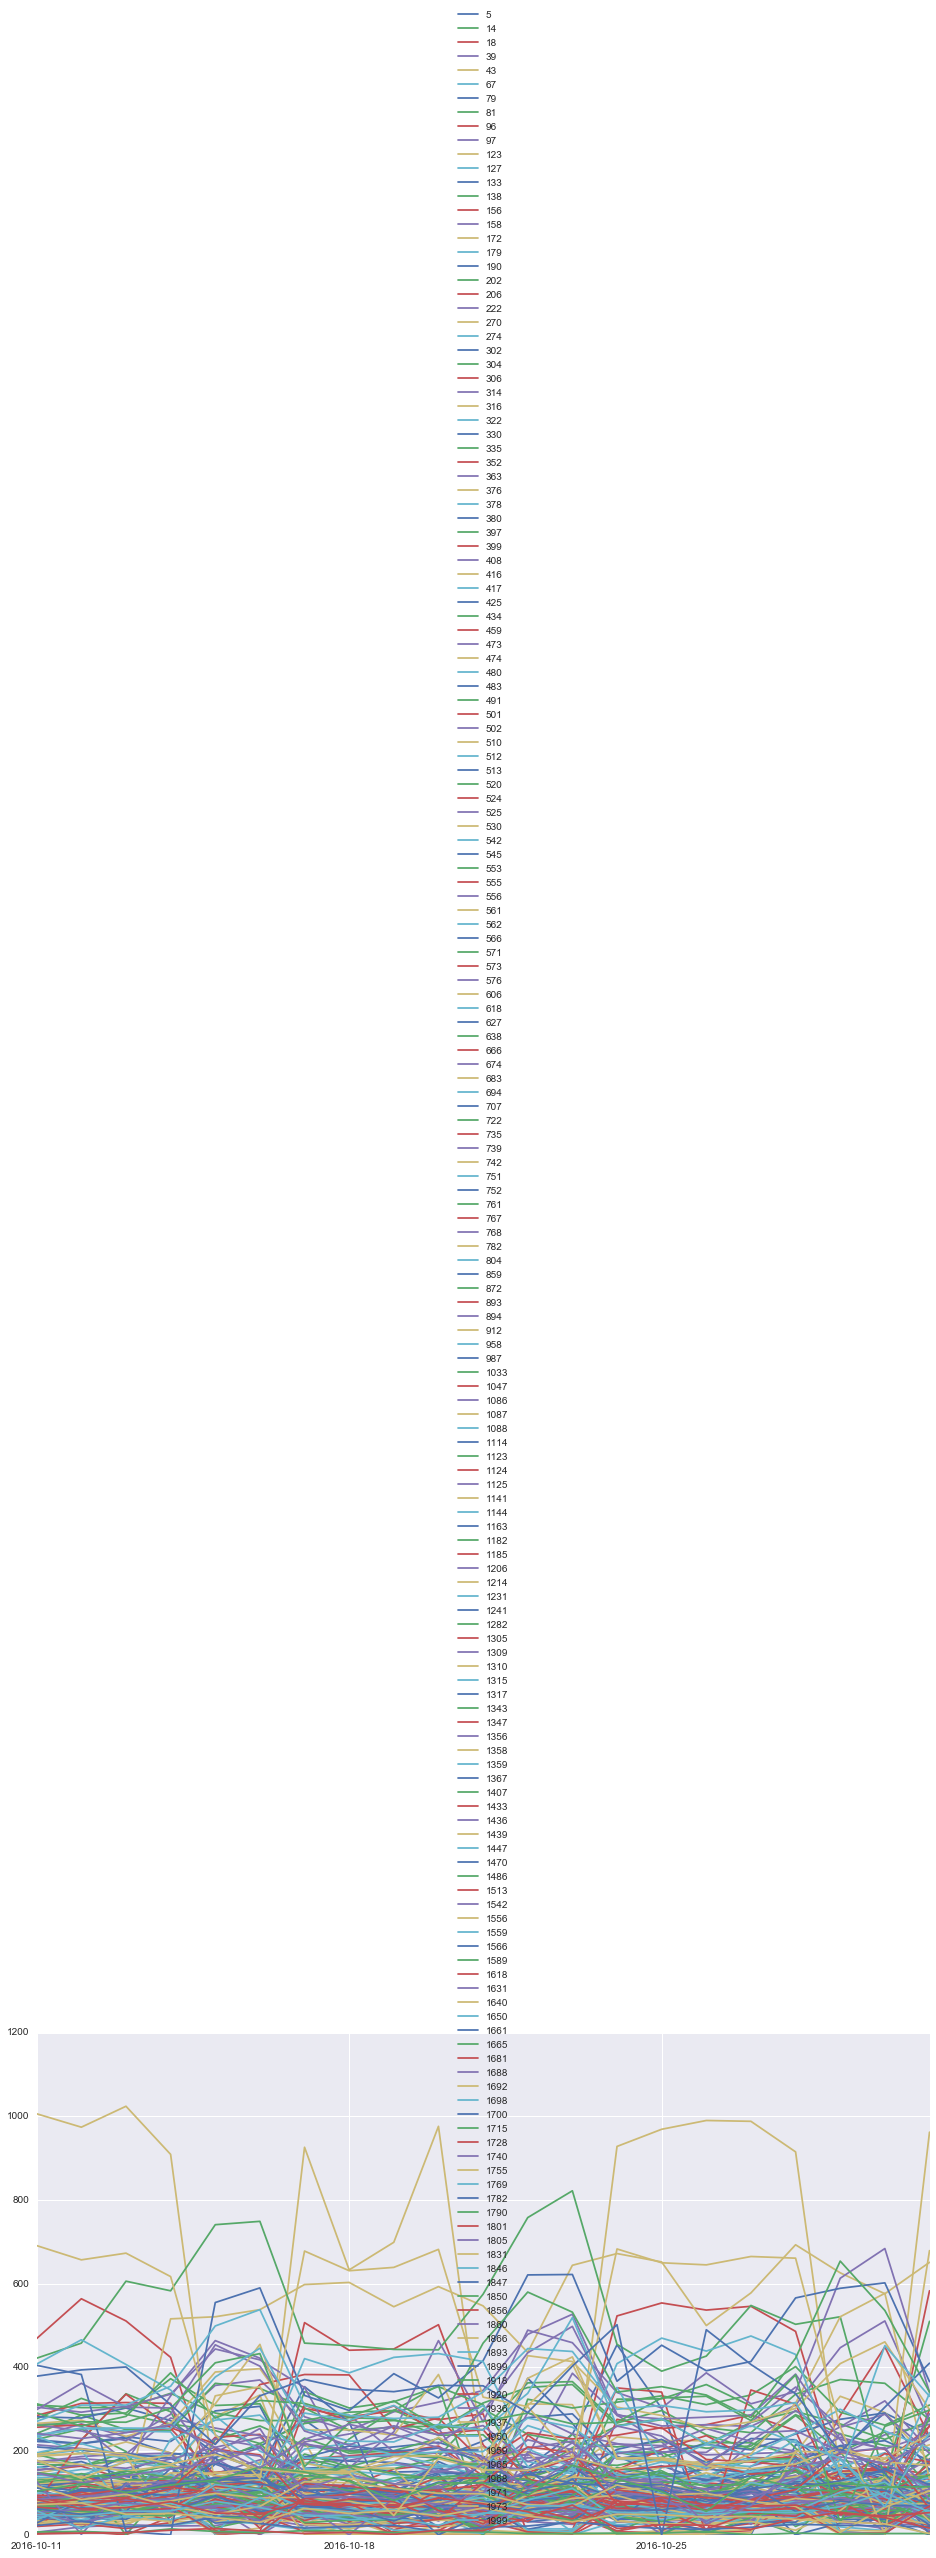

In [258]:
ids_lowest_point_error_compared_to_last_three_days = []
def cal_lowest_point_error_compared_to_last_three_days(x):
    sales_list = sorted(x['2016-10-11':'2016-10-31'].tolist())
    if sales_list[1] > 0:
        if 1.0 * sales_list[0] / sales_list[1] < 0.7:
            ids_lowest_point_error_compared_to_last_three_days.append(x['shop_id'])
shop_info.apply(lambda x: cal_lowest_point_error_compared_to_last_three_days(x) ,axis=1)
print len(ids_lowest_point_error_compared_to_last_three_days)

draw_ids(ids_lowest_point_error_compared_to_last_three_days,start_date='2016-10-11',end_date='2016-10-31',by_week=True)

## 最后三周出现相对三周外极高点的

## 最后三周出现相对三周外极低点的

## 最后三天出现零值的

[513, 987, 1707, 1716, 1824, 1831]
[1824, 513, 1831, 1707, 1716, 987]


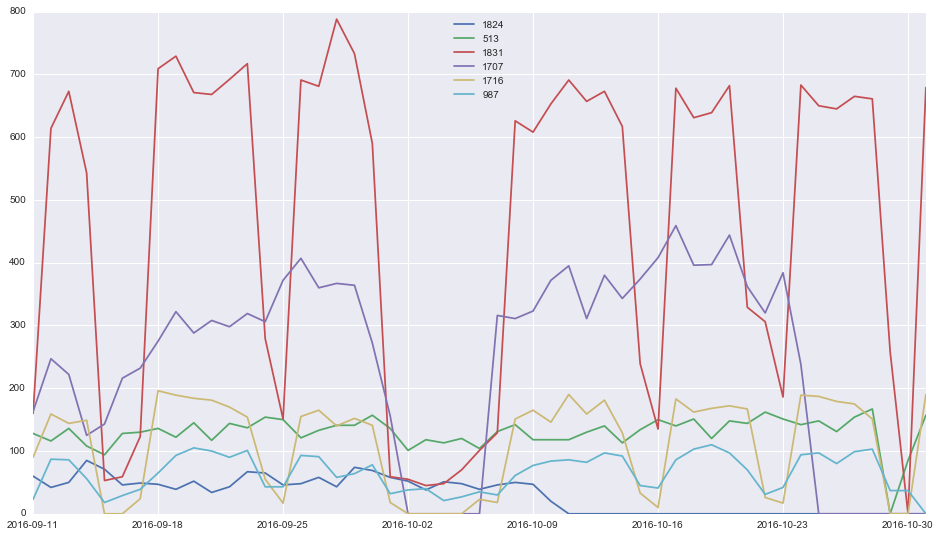

In [133]:
ids_zero_in_last_three_week = {}
for date in dateRange('2016-10-29','2016-10-31'):
    for id in shop_info[shop_info[date]==0]['shop_id'].tolist():
        if id not in ids_zero_in_last_three_week.keys():
            ids_zero_in_last_three_week[id] = 0
        ids_zero_in_last_three_week[id] += 1
print sorted(ids_zero_in_last_three_week.keys())
print ids_zero_in_last_three_week.keys()
def draw_id_group_size(n):
    for i in range(len(ids_zero_in_last_three_week.keys())/n + 1):
        s = 0 + i*10
        e = 10 + i*10 
        if i == len(ids_zero_in_last_three_week.keys())/n : e = len(ids_zero_in_last_three_week.keys())
        draw_ids(ids_zero_in_last_three_week.keys()[s:e],start_date='2016-09-11',end_date='2016-10-31',by_week=True)
draw_id_group_size(10)

## 倒数第一周与第二周相对差过大

In [71]:
shop_info.head()

shop_id city_name  location_id  per_pay  score  comment_cnt  shop_level  \
1        1        湖州          885        8    4.0         12.0           2   
2        2       哈尔滨           64       19    NaN          NaN           1   
3        3        南昌          774        5    3.0          2.0           0   
4        4        天津          380       18    NaN          NaN           1   
5        5        杭州          263        2    2.0          2.0           0   

  cate_1_name cate_2_name cate_3_name     ...           wk_59       wk_60  \
1          美食        休闲茶饮       饮品/甜点     ...      250.571429  256.857143   
2       超市便利店          超市         NaN     ...      103.857143  116.857143   
3          美食        休闲茶饮          奶茶     ...       86.571429   79.000000   
4       超市便利店          超市         NaN     ...      142.714286  148.571429   
5          美食        休闲食品        生鲜水果     ...        0.000000    0.000000   

        wk_61       wk_62       wk_63       wk_64       wk_65       wk_66  \
1  252.857143  220.857143  232.428571  240.142857  252.571429  242.857143   
2  117.571429  119.142857   83.571429   97.142857   69.000000    0.000000   
3   78.571429   84.285714   76.857143  104.142857   87.000000   78.428571   
4  143.857143  137.857143  124.000000  117.142857  109.285714  120.714286   
5    0.142857  137.285714  218.285714  101.428571  163.142857  219.428571   

        wk_67       wk_68  
1  217.000000  231.714286  
2   62.428571   92.714286  
3   88.571429   83.571429  
4  122.000000  126.428571  
5  239.142857  178.714286  

[5 rows x 568 columns]

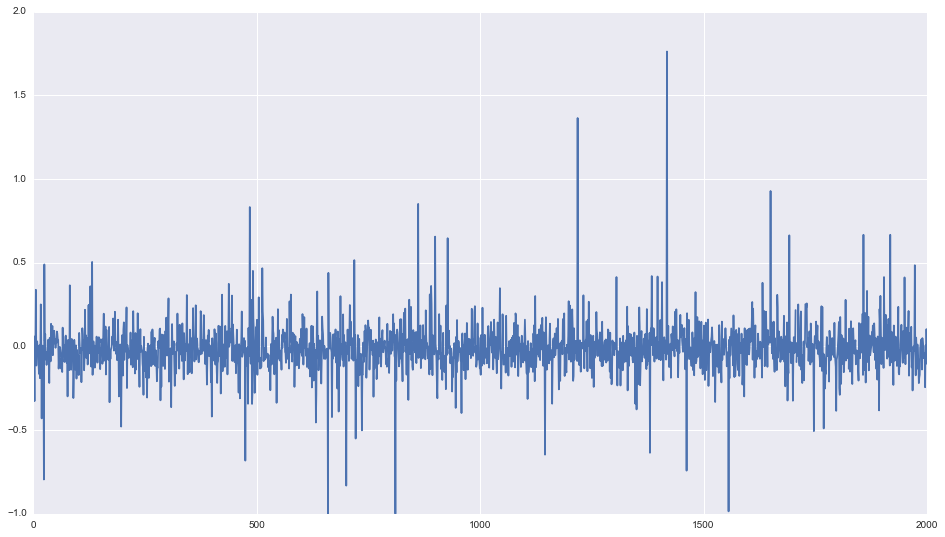

In [78]:
shop_info['relatively_diff_between_wk_67_68'] = (shop_info['wk_67']-shop_info['wk_68'])/shop_info['wk_68']
shop_info['relatively_diff_between_wk_67_68'].plot(figsize=(16,9))

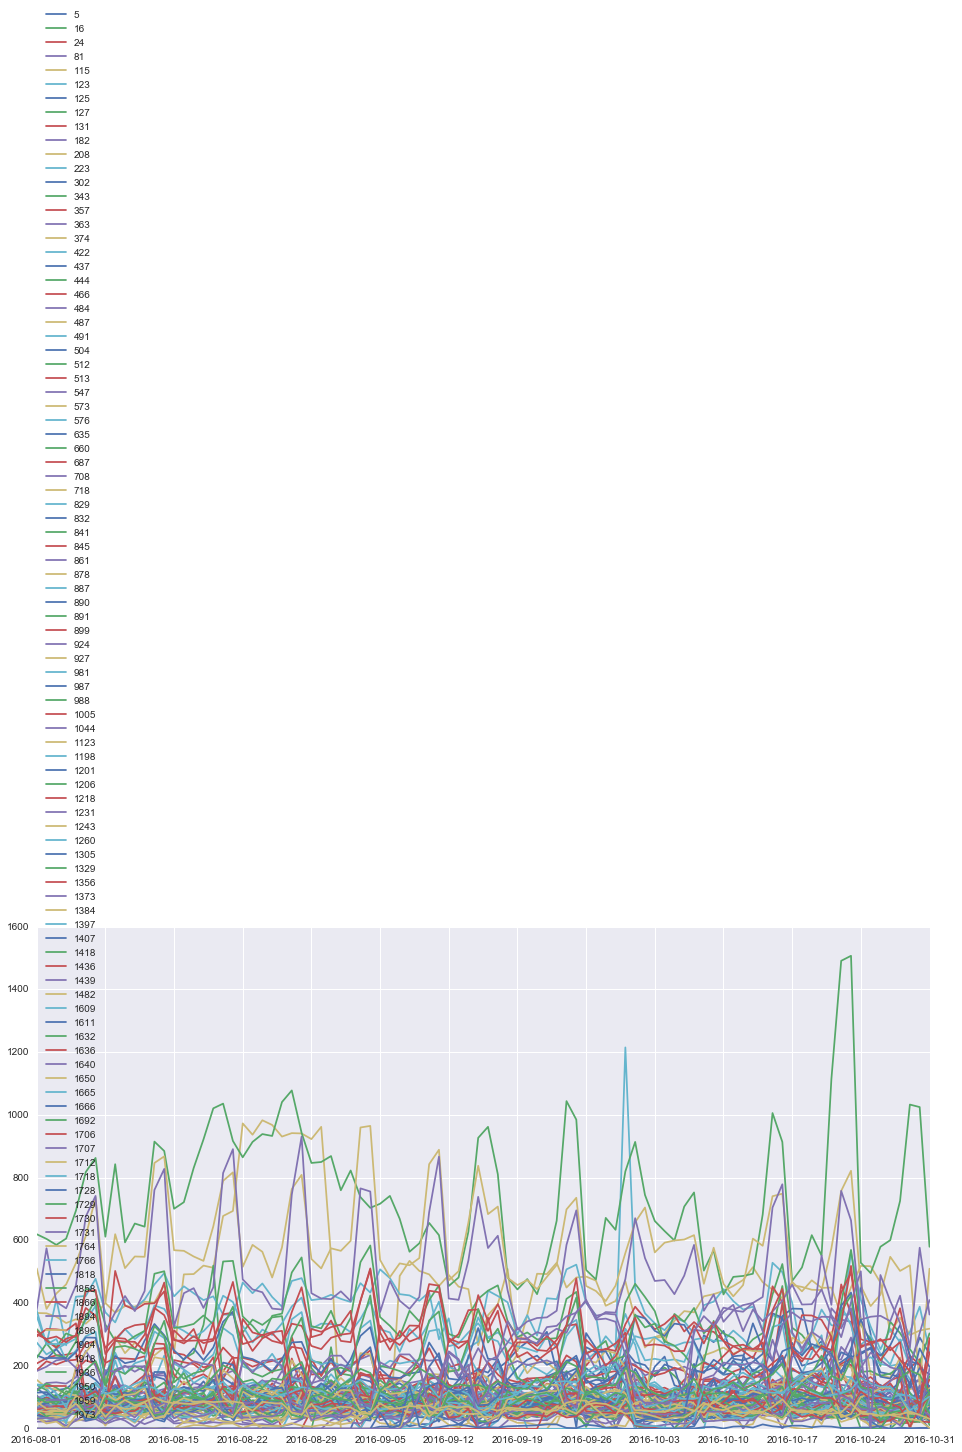

In [129]:
ids_relatively_diff_between_wk_67_68_high = shop_info['relatively_diff_between_wk_67_68'][shop_info['relatively_diff_between_wk_67_68']>0.2].index.tolist()
draw_ids(ids_relatively_diff_between_wk_67_68_high,start_date='2016-08-01',end_date='2016-10-31',by_week=True)

大概分为两种，一种是count较大出现第三周下降的，一种是本身count小因此波动比较大的

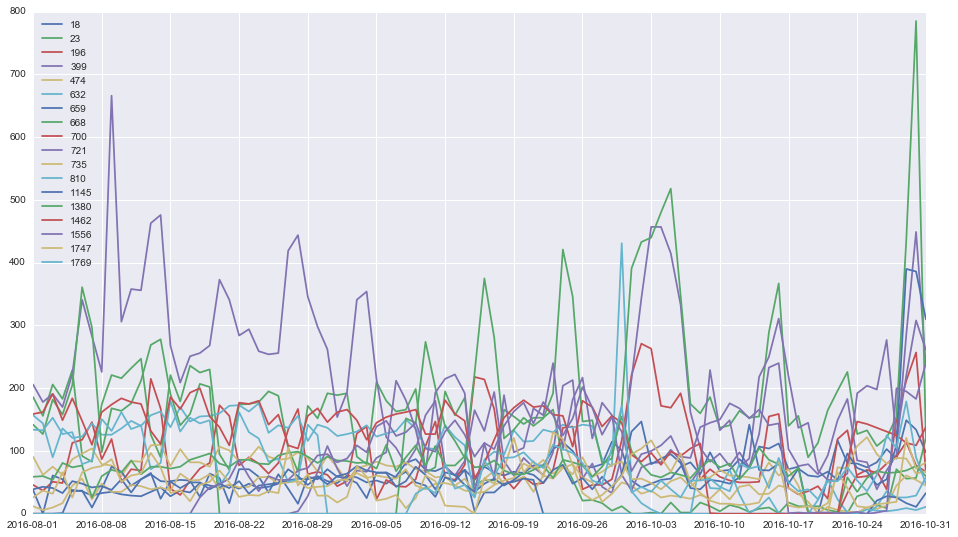

In [130]:
ids_relatively_diff_between_wk_67_68_low = shop_info['relatively_diff_between_wk_67_68'][shop_info['relatively_diff_between_wk_67_68']<-0.4].index.tolist()
draw_ids(ids_relatively_diff_between_wk_67_68_low,start_date='2016-08-01',end_date='2016-10-31',by_week=True)

## 倒数第二周与第三周相对差过大

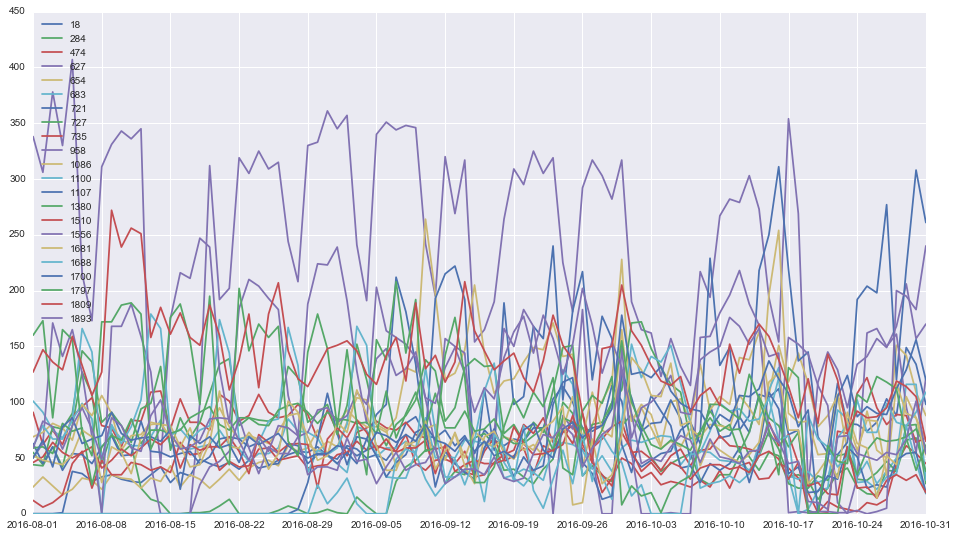

In [131]:
shop_info['relatively_diff_between_wk_66_67'] = (shop_info['wk_66']-shop_info['wk_67'])/shop_info['wk_67']
ids_relatively_diff_between_wk_66_67_high = shop_info['relatively_diff_between_wk_66_67'][shop_info['relatively_diff_between_wk_66_67']>0.4].index.tolist()
draw_ids(ids_relatively_diff_between_wk_66_67_high,start_date='2016-08-01',end_date='2016-10-31',by_week=True)

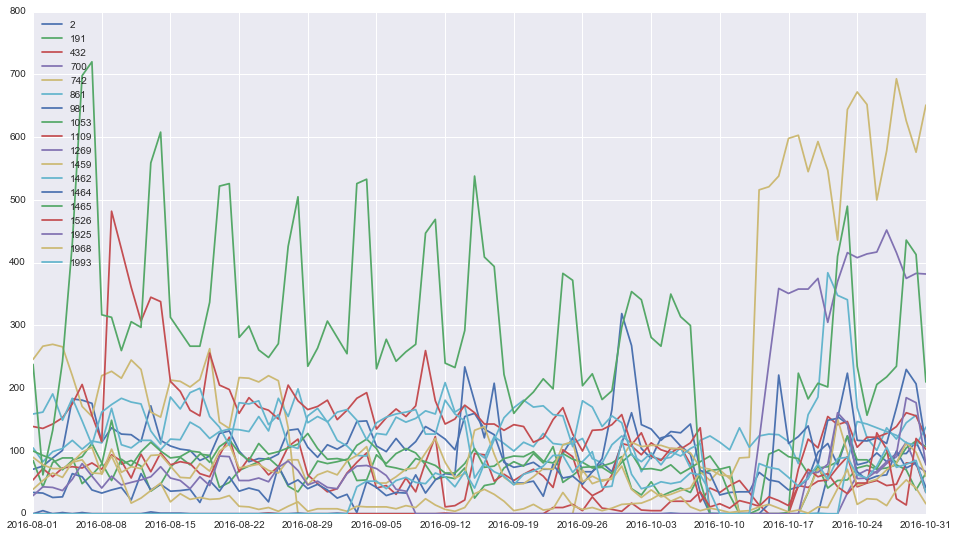

In [132]:
ids_relatively_diff_between_wk_66_67_low = shop_info['relatively_diff_between_wk_66_67'][shop_info['relatively_diff_between_wk_66_67']<-0.4].index.tolist()
draw_ids(ids_relatively_diff_between_wk_66_67_low,start_date='2016-08-01',end_date='2016-10-31',by_week=True)

## 三周的余弦相似度过低

In [242]:
ids_cos_sim_low_between_wk_1_2 = shop_info[shop_info['cos_sim_between_wk_1_2']<0.98].index.tolist()
ids_cos_sim_low_between_wk_2_3 = shop_info[shop_info['cos_sim_between_wk_2_3']<0.98].index.tolist()
ids_cos_sim_low_between_wk_1_3 = shop_info[shop_info['cos_sim_between_wk_1_2']<0.98].index.tolist()
ids_cos_sim_low_3_wk = []
ids_cos_sim_low_3_wk.extend(ids_cos_sim_low_between_wk_1_2)
ids_cos_sim_low_3_wk.extend(ids_cos_sim_low_between_wk_2_3)
ids_cos_sim_low_3_wk.extend(ids_cos_sim_low_between_wk_1_3)
ids_cos_sim_low_3_wk = list(set(ids_cos_sim_low_3_wk))
print len(ids_cos_sim_low_between_wk_1_2)
print len(ids_cos_sim_low_between_wk_2_3)
print len(ids_cos_sim_low_between_wk_1_3)
print len(ids_cos_sim_low_3_wk)
ids_cos_sim_high_3_wk =[ i  for i in shop_info.index.tolist() if i not in ids_cos_sim_low_3_wk]
print len(ids_cos_sim_high_3_wk)

582
681
582
887
1113


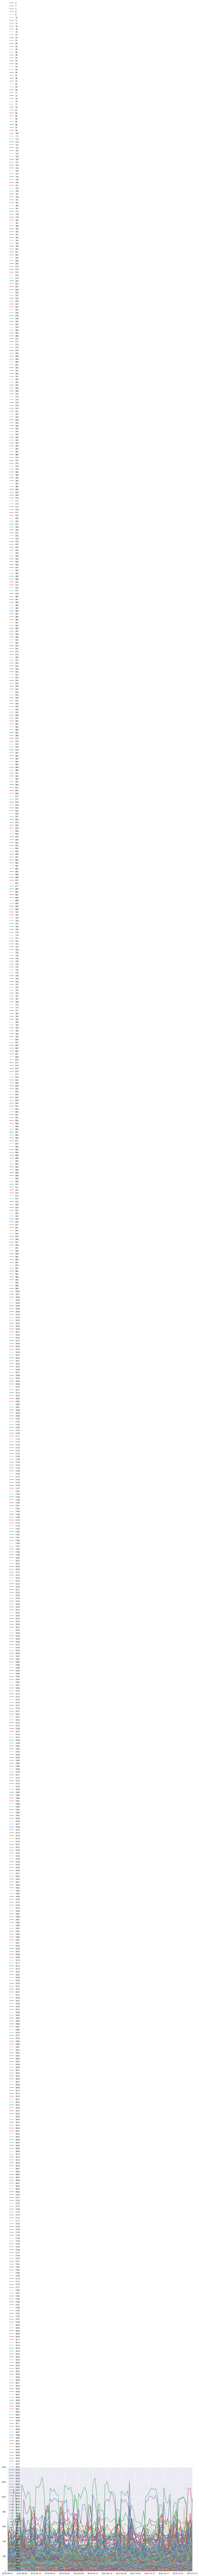

In [243]:
draw_ids(ids_cos_sim_low_3_wk,start_date='2016-08-01',end_date='2016-10-31',by_week=True)

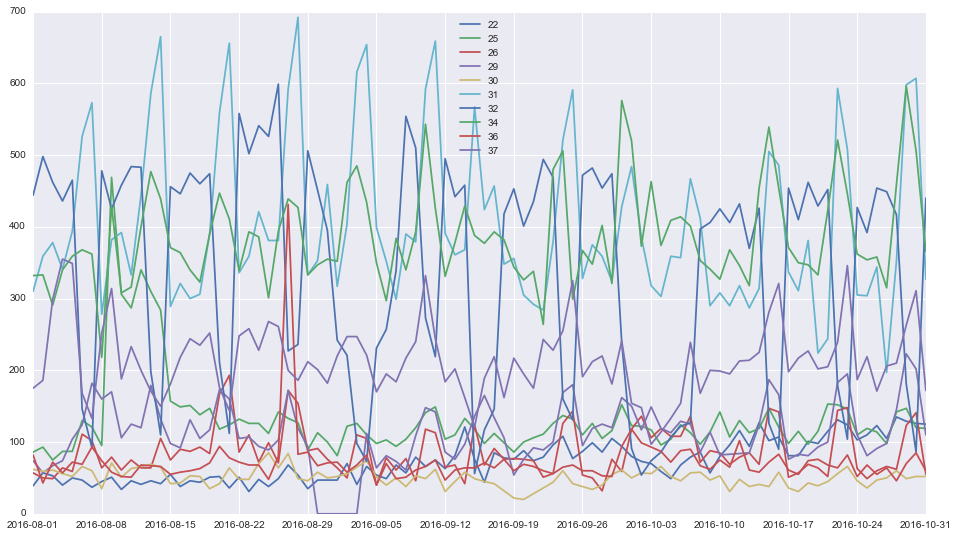

In [244]:
draw_ids(ids_cos_sim_high_3_wk[10:20],start_date='2016-08-01',end_date='2016-10-31',by_week=True)

## 最后八月才开始营业的(十几个 )  
最后九月才开始营业的就差没有了 总体稳定 基本可以忽略这个观察

In [126]:
ids_start_in_16_Aug = []
def cal_start_in_last_5_wk(x):
    for day in dateRange('2015-07-01','2016-10-31'):
        if x[day]>0:
            start_day = day
            #print start_day
            break
    if pd.to_datetime(start_day).date() >= pd.to_datetime('2016-08-01').date():
        ids_start_in_16_Aug.append(x['shop_id'])
shop_info.apply(lambda x: cal_start_in_last_5_wk(x),axis=1)


1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
30      None
        ... 
1971    None
1972    None
1973    None
1974    None
1975    None
1976    None
1977    None
1978    None
1979    None
1980    None
1981    None
1982    None
1983    None
1984    None
1985    None
1986    None
1987    None
1988    None
1989    None
1990    None
1991    None
1992    None
1993    None
1994    None
1995    None
1996    None
1997    None
1998    None
1999    None
2000    None
dtype: object

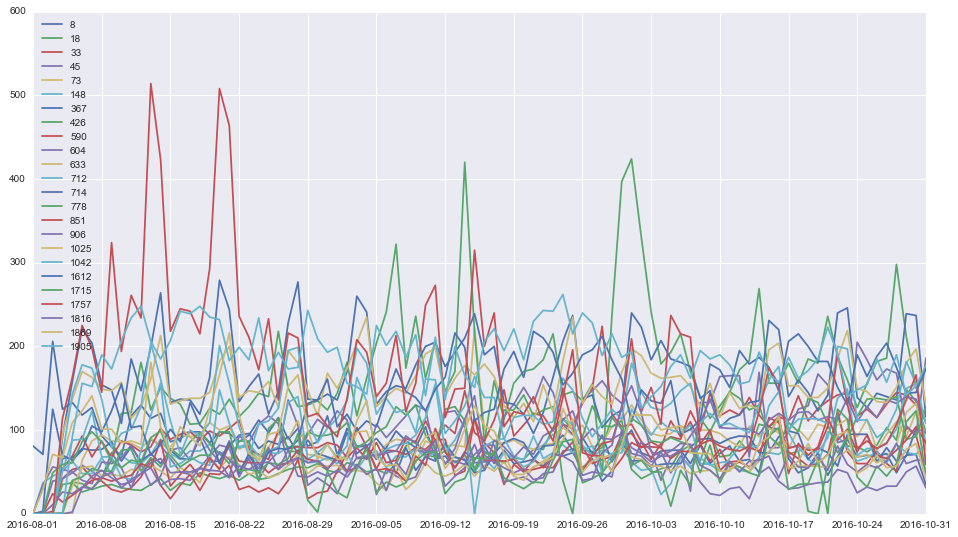

In [128]:
print len(ids_start_in_16_Aug)
draw_ids(ids_start_in_16_Aug,start_date='2016-08-01',end_date='2016-10-31',by_week=True)

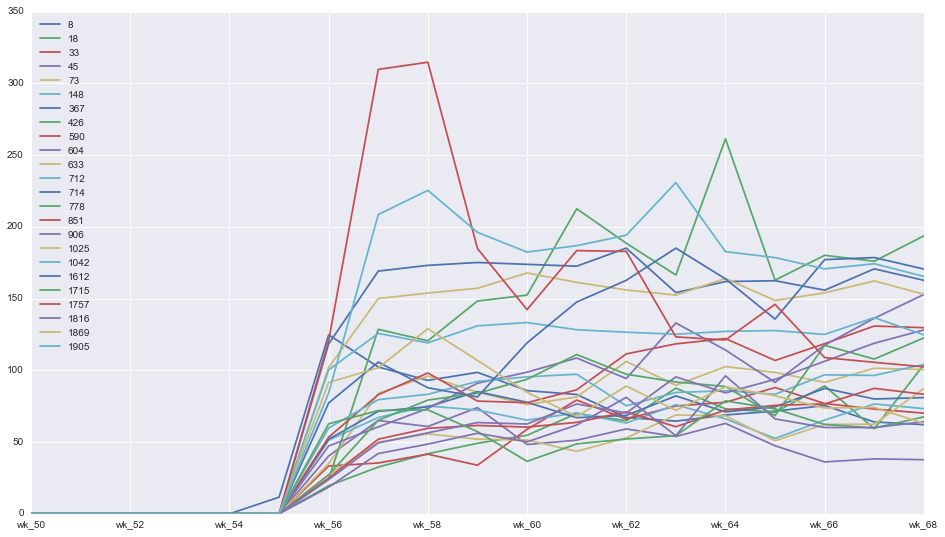

In [139]:
draw_week_ids(ids_start_in_16_Aug,start_date='wk_50',end_date='wk_68')

上升 下降 平稳都有

## 波动幅度

In [263]:
def cal_wave_range(x):
    sales_count = sorted(x['2016-10-11':'2016-10-31'].tolist())
    if sum(sales_count[18:]) == 0 :return 0
    return (sum(sales_count[18:]) - sum(sales_count[:3]))/float(sum(sales_count[18:]))
shop_info['wave_range'] = shop_info.apply(lambda x: cal_wave_range(x),axis = 1)

In [261]:
sorted(shop_info.loc[1,'2016-10-11':'2016-10-31'].tolist())

[172,
 177,
 180,
 202,
 207,
 207,
 216,
 226,
 228,
 230,
 239,
 243,
 244,
 244,
 251,
 254,
 255,
 257,
 264,
 264,
 281]

In [266]:
pd.qcut(shop_info['wave_range'],5).value_counts()

(0.532, 0.64]     401
(0.453, 0.532]    400
(0.378, 0.453]    400
[0, 0.378]        400
(0.64, 1]         399
Name: wave_range, dtype: int64

## 最后三周趋势

In [267]:
1<2<3

True

In [272]:
ids_trend_zero = []
ids_trend_up = []
ids_trend_down = []
ids_trend_flat = []
ids_trend_mess = []

def cal_trend_last_three_weeks(x):
    wk1 = x['wk_66']
    wk2 = x['wk_67']
    wk3 = x['wk_68']
    if wk1 == 0 or wk2 == 0 or wk3 == 0 :
        ids_trend_zero.append(x['shop_id'])
        return 'zero'
    if wk2/wk1 > 1.05 and wk3/wk2 > 1.05 :
        ids_trend_up.append(x['shop_id'])
        return 'up'
    if wk2/wk1 < 0.95 and wk3/wk2 < 0.95 : 
        ids_trend_down.append(x['shop_id'])
        return 'down'
    if 0.95 < wk2/wk1 < 1.05 and 0.95 < wk3/wk2 < 1.05 :
        ids_trend_flat.append(x['shop_id'])
        return 'flat'
    else : 
        ids_trend_mess.append(x['shop_id'])
        return 'mess'
    
shop_info['trend_last_three_weeks'] = shop_info.apply(lambda x: cal_trend_last_three_weeks(x),axis = 1)

In [273]:
shop_info['trend_last_three_weeks'].value_counts()

mess    1344
flat     395
up       135
down     117
zero       9
Name: trend_last_three_weeks, dtype: int64

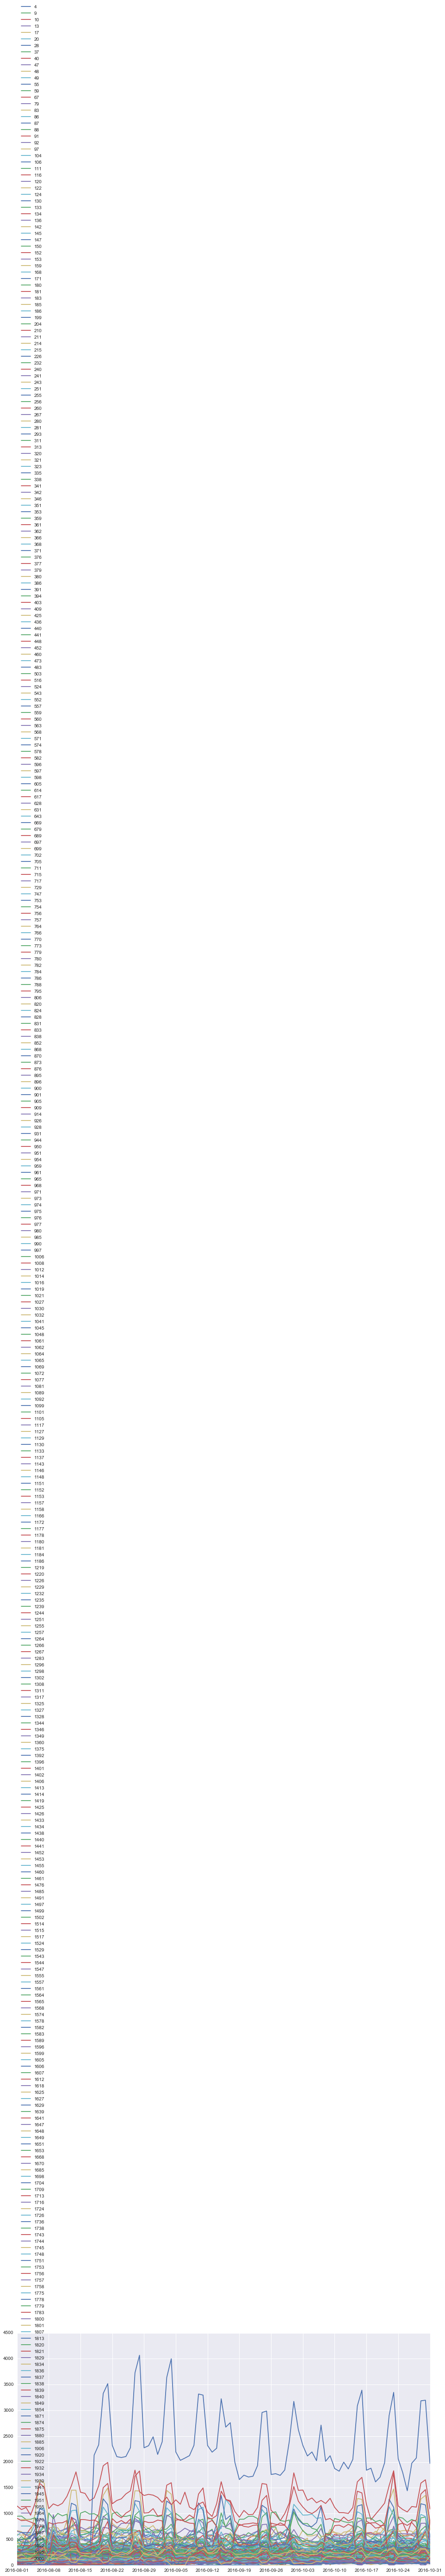

In [277]:
draw_ids(ids_trend_flat,start_date='2016-08-01',end_date='2016-10-31',by_week=True)

In [ ]:
## 长期趋势

In [ ]:
## 有2015双十一数据的

In [ ]:
## 有2016七夕8.9数据的

In [ ]:
##营业后多次出现零值的

In [ ]:
# 实现相似 ID 查找算法